<br><br>
<h1 align="center"> 01 Initial Analysis </h1>
<h4 align="center"> ( Data Cleaning and Praparation ) </h4>
<br><br>

In [ ]:
'''import thpe libraries'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
import time

'''We will use ggplot for the initial plots.'''
plt.style.use('ggplot')
start_time = time.time()

In [1]:
'''load the data. It's big, set low_memory=False'''
loan_data = pd.read_csv('/opt/apps/ml-data/bigdata/lending_club/loan.csv', low_memory=False)

NameError: name 'pd' is not defined

In [3]:
'''How many rows and columns?'''
print(loan_data.shape)

(2260668, 145)


In [4]:
'''Take a glance on the data'''
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
'''A glance of the numericadl distribution'''
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,url,dti,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,0.0,2.258957e+06,...,10613.0,10613.000000,10613.0,10613.000000,8426.000000,10613.000000,10613.000000,33056.000000,33056.000000,33056.000000
mean,NaN,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309291e+01,4.458076e+02,7.799243e+04,NaN,1.882420e+01,...,3.0,155.006696,3.0,13.686422,454.840802,11628.036442,193.606331,5030.606922,47.775600,13.148596
std,NaN,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832114e+00,2.671737e+02,1.126962e+05,NaN,1.418333e+01,...,0.0,129.113137,0.0,9.728138,375.830737,7615.161123,198.694368,3692.027842,7.336379,8.192319
min,NaN,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,NaN,-1.000000e+00,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,NaN,1.189000e+01,...,3.0,59.370000,3.0,5.000000,174.967500,5628.730000,43.780000,2227.000000,45.000000,6.000000
50%,NaN,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,NaN,1.784000e+01,...,3.0,119.040000,3.0,15.000000,352.605000,10044.220000,132.890000,4172.855000,45.000000,14.000000
75%,NaN,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,NaN,2.449000e+01,...,3.0,213.260000,3.0,22.000000,622.792500,16114.940000,284.180000,6870.782500,50.000000,18.000000
max,NaN,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,NaN,9.990000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


In [6]:
'''
A first look at the data, null values, data types, unique values etc.
Check which columns are having all null values. We need to drop those columns.
Also, check the columns having one or more null values. We need to take care of them.
'''
cols = loan_data.columns
null_count = 0
null_pct = 'None'
d = []
d_types = loan_data.dtypes

for ind, col in enumerate(cols):
    if loan_data[col].isnull().all():
        null_count = 'all'
        null_pct = '100%'
    else:
        null_count = loan_data[col].isnull().sum()
        total_records = len(loan_data)
        if null_count > 0 and null_count < total_records*(0.1):
            null_pct = 'less than 10%'
        elif null_count >= total_records*(0.1) and null_count < total_records*(0.2):
            null_pct = '10 to 20%'
        elif null_count >= total_records*(0.2) and null_count < total_records*(0.3):
            null_pct = '20 to 30%'
        elif null_count >= total_records*(0.3) and null_count < total_records*(0.4):
            null_pct = '30 to 40%'
        elif null_count >= total_records*(0.4) and null_count < total_records*(0.5):
            null_pct = '40 to 50%'
        elif null_count >= total_records*(0.5) and null_count < total_records*(0.75):
            null_pct = '50 to 75%'
        elif null_count >= total_records*(0.75) and null_count < total_records*(0.9):
            null_pct = '50 to 75%'
        elif null_count >= total_records*(0.9):
            null_pct = 'more than 90%'
    

    d.append({'col': col, 'null_count': null_count, 'null_pct': null_pct, 'd_type': d_types[col], 
              'n_unique': loan_data[col].nunique()})
    null_count = 0
    null_pct = 'None'
    
    
loan_data_info = pd.DataFrame(d)

# Write the loan_data_info to CSV file
# loan_data_info.to_csv('loan_features.csv', sep=',', encoding='UTF-8')

# Write the loan_data_info to .xlsx file
#loan_data_info.to_csv('loan_features.xlsx')

# Display the dataframe as HTML table
display(HTML(loan_data_info.to_html()))
    
    

,col,null_count,null_pct,d_type,n_unique
0,id,all,100%,float64,0
1,member_id,all,100%,float64,0
2,loan_amnt,0,None,int64,1572
3,funded_amnt,0,None,int64,1572
4,funded_amnt_inv,0,None,float64,10057
5,term,0,None,object,2
6,int_rate,0,None,float64,673
7,installment,0,None,float64,93296
8,grade,0,None,object,7
9,sub_grade,0,None,object,35


In [7]:
'''How many missing values in the data set?'''
loan_data_info['null_pct'].value_counts()

less than 10%    54
more than 90%    35
None             32
30 to 40%        12
50 to 75%         6
100%              3
40 to 50%         2
10 to 20%         1
Name: null_pct, dtype: int64

In [8]:
'''What is the major data types?'''
loan_data_info['d_type'].value_counts()

float64    105
object      36
int64        4
Name: d_type, dtype: int64

In [9]:
'''Remove all domain-expert identified columns'''
removed_cols = pd.read_csv('removed_cols.csv')
print('Total columns removed:', len(removed_cols))

loan_data.drop(columns=removed_cols['col'], inplace=True)

print(loan_data.shape)

Total columns removed: 109
(2260668, 36)


In [10]:
'''
We will drop all the Current loans. 
We will work on only the completed loans.
Current loans may or may not turn into a good or bad loan.
'''
loan_data[loan_data["loan_status"]=='Current']

indexNames = loan_data[loan_data["loan_status"]=='Current'].index
loan_data.drop(indexNames , inplace=True)
print(loan_data.shape)

(1340973, 36)


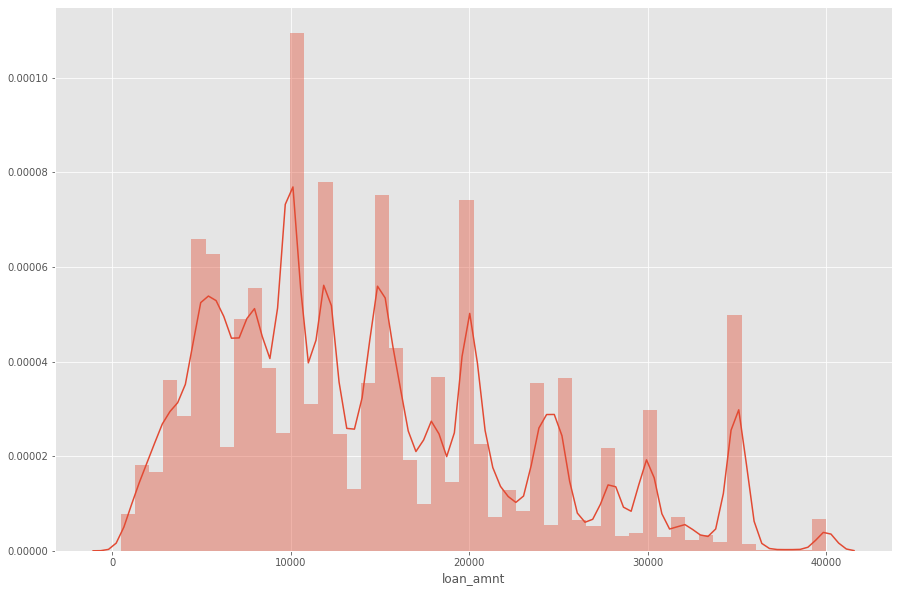

In [11]:
'''Maximum loan amount range is $5k to $ 20k'''
plt.figure(figsize=(15, 10))
sns.distplot(loan_data['loan_amnt'])

plt.show()

In [12]:
'''There are two loan terms'''
loan_data['term'].value_counts()

 36 months    1011413
 60 months     329560
Name: term, dtype: int64

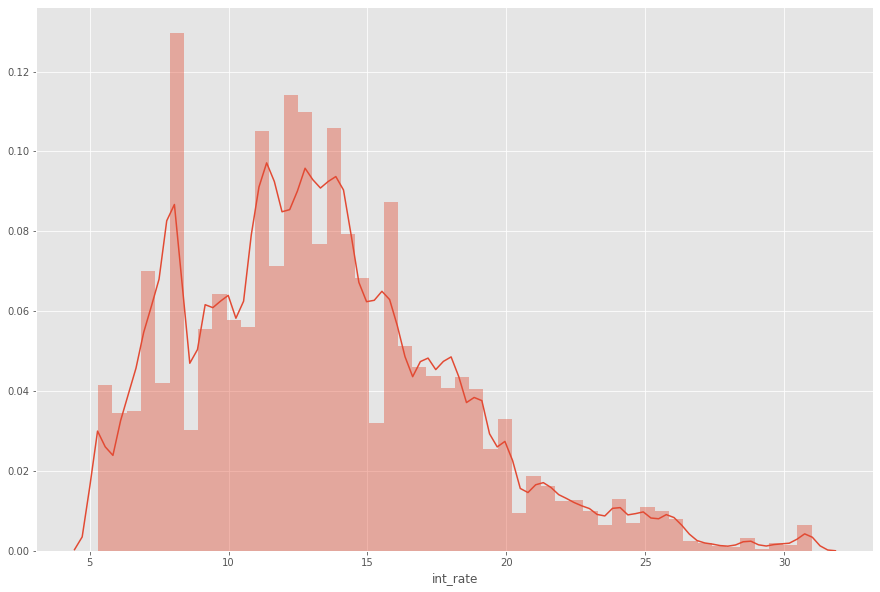

In [13]:
'''Most of the interest range is between 5% to 15%'''
plt.figure(figsize=(15, 10))
sns.distplot(loan_data['int_rate'])

plt.show()